In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Step 2: Load Dataset

In [2]:
data = pd.read_csv(r"C:\Users\nitin\Downloads\urban_green_safety.csv")
data.head()

,city,district_zone,pm25_level,pm10_level,noise_day_db,noise_night_db,air_quality_index,water_quality_index,green_cover_percentage,vehicle_density_per_km2,avg_temperature_celsius,industrial_units_count,population_density,life_expectancy,environmental_safety_index
0,Hyderabad,Residential,57.6,89.5,74.4,63.8,40.3,75.6,23.6,566.0,25.2,142.0,9052.0,74.7,88.6
1,Bangalore,Mixed,113.7,140.2,76.2,66.9,87.9,63.7,15.9,240.0,23.4,27.0,7846.0,70.7,74.6
2,Bangalore,Residential,77.1,138.2,74.6,65.1,64.0,85.9,7.4,210.0,27.1,26.0,8166.0,72.3,78.3
3,Mumbai,Mixed,81.0,136.1,64.7,52.9,50.5,59.1,30.4,533.0,31.6,195.0,7151.0,72.5,89.2
4,Lucknow,Mixed,110.0,189.3,73.4,65.2,82.8,62.9,18.4,582.0,32.6,116.0,9699.0,72.5,77.0


Step 3: Data Preprocessing

In [3]:
# 1. Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Fill missing numeric values with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill missing categorical values with mode
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

# 2. Encode categorical columns
le = LabelEncoder()
for col in ['city', 'district_zone']:
    data[col] = le.fit_transform(data[col])

# 3. Check final data types
data.info()

Missing values per column:
 city                           4
district_zone                  6
pm25_level                     5
pm10_level                     4
noise_day_db                   6
noise_night_db                 2
air_quality_index             12
water_quality_index            1
green_cover_percentage         6
vehicle_density_per_km2        6
avg_temperature_celsius        6
industrial_units_count         8
population_density             6
life_expectancy                6
environmental_safety_index     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        500 non-null    int64  
 1   district_zone               500 non-null    int64  
 2   pm25_level                  500 non-null    float64
 3   pm10_level                  500 non-null    float64
 4   noise_day_db

Step 4: Feature Selection

In [5]:
# Define features (X) and target (y)
X = data.drop('environmental_safety_index', axis=1)
y = data['environmental_safety_index']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Feature Scaling

In [6]:
# Scale only numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 6: Model Training (Random Forest Regressor)

In [7]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

Step 7: Model Evaluation

In [8]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 1.41
Root Mean Squared Error: 1.87
R² Score: 0.93


Step 8: Feature Importance Analysis

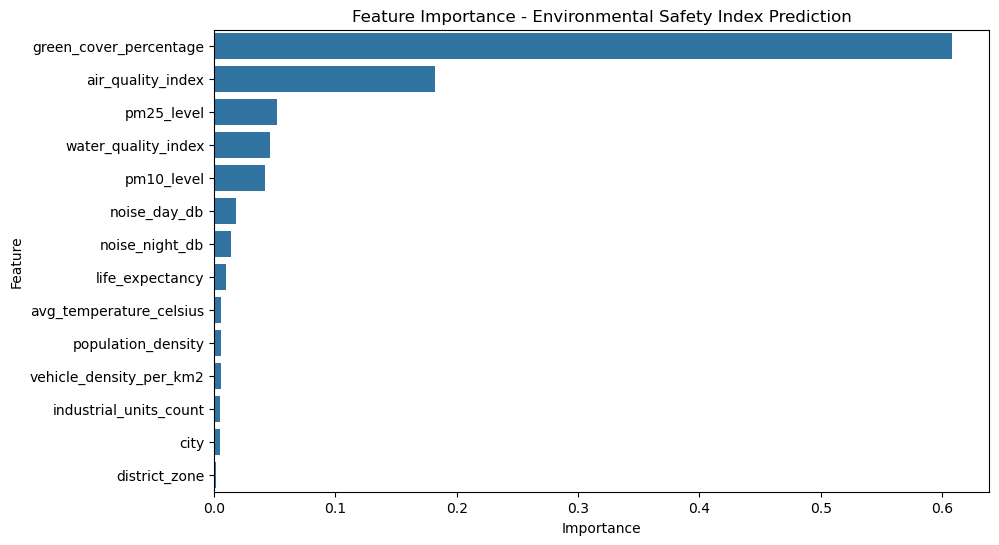

In [9]:
# Get feature importance
importances = model.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance - Environmental Safety Index Prediction')
plt.show()

Step 9: Correlation Insights

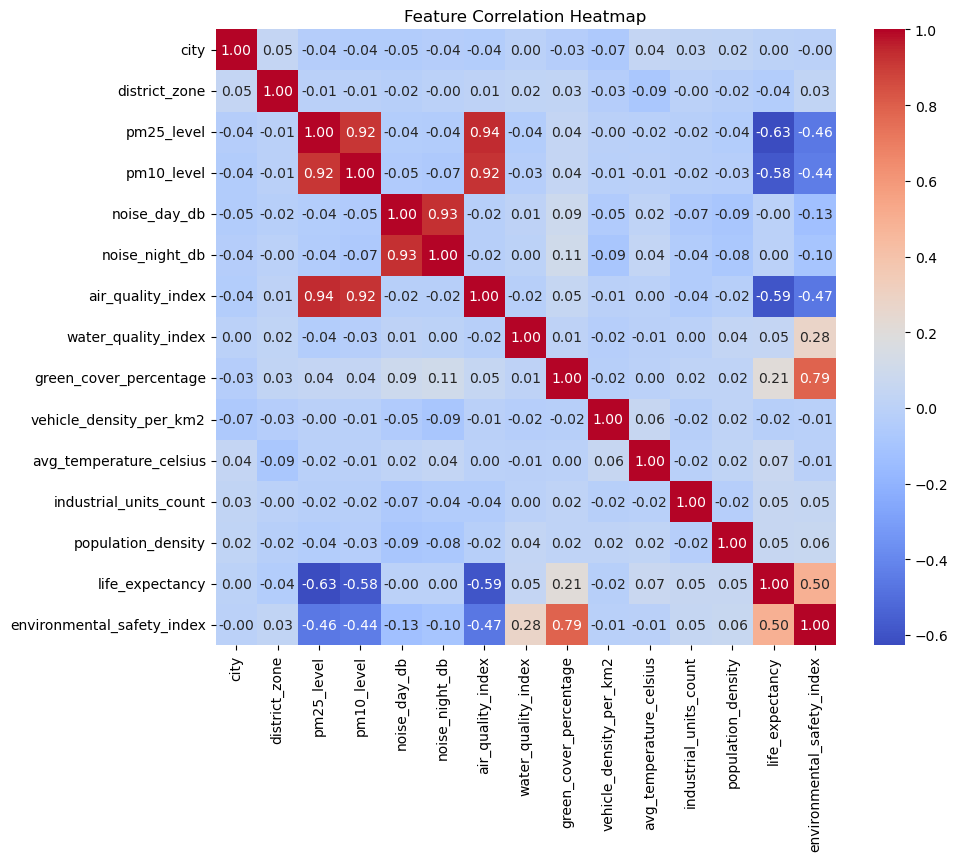

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()